## Forecasting Gas Prices With Machine Learning Methods

In this Notebook, I extract data on gas prices from a CSV file and try to forecast the data from up to one year past the latest date given in the dataset.

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import Ridge, LinearRegression
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
csv_path = Path.home() /"downloads"/ "Nat_Gas.csv"
df = pd.read_csv(csv_path,low_memory = False)

In [11]:
def linear_sin_model(x, a, b, c, d, e, f):
    """
    Linear and trig function mixed
    x = Input date array (in months since start of data)
    a,b,c: Coeffs for linear component
    d,e,f: coeffs for trig component
    """
    return a * x + b + d + np.sin(2*np.pi*(e*x+f)) + c

def fit_gas_prices(dates, prices):
    """
    Fitting data to linear sin model
    dates: Input date array
    prices: Gas price array according to date
    """
    #Normalise dates to start from 0
    start_dates = min(dates)
    normalised_dates = np.array(dates) - start_dates
    # Perform curve fitting to get coeffs, and unpack
    coeffs, _ = curve_fit(linear_sin_model, normalised_dates, prices)
    a,b,c,d,e,f = coeffs
    #create and return prediction function

    def predict_gas_price(date):
        normalised_date = date - start_dates

        #use model to predict
        return linear_sin_model(normalised_date, a, b, c, d, e, f)

    return predict_gas_price

In [14]:
dates = np.arange(48)
gas_prices = df['Prices']

predict_gas_prices = fit_gas_prices(dates, gas_prices) #our linear sin graph
date_to_predict = 58
predicted_price = predict_gas_prices(date_to_predict)
print(predicted_price)

12.066690311234197


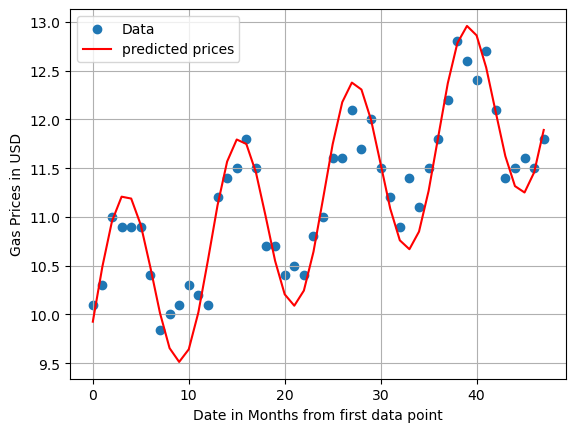

In [17]:
plt.scatter(dates,gas_prices,label = 'Data')
plt.plot(dates,predict_gas_prices(np.array(dates)),color = 'red',label = 'predicted prices')
plt.xlabel('Date in Months from first data point')
plt.ylabel('Gas Prices in USD')
plt.legend()
plt.grid(True)
plt.show()